In [75]:
%matplotlib inline
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import rtmtools.lblrtm.visualisation as viz

from IPython import display

In [76]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'lblnew_20160916_tmp')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [77]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_fluxg = ds.set_coords(['level'])

In [78]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_coolrg = ds.set_coords(['layer'])

In [79]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [80]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [81]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [121]:
# load dgds
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [84]:
ds_fluxg

<xarray.Dataset>
Dimensions:   (g: 4, pressure: 76)
Coordinates:
  * pressure  (pressure) float64 0.0 0.0006244 0.0008759 0.001229 0.001723 ...
  * g         (g) int64 1 2 3 4
    level     (pressure, g) int64 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 6 ...
Data variables:
    flug      (pressure, g) float64 -12.97 -3.166 -4.34 -0.3917 -12.97 ...
    fldg      (pressure, g) float64 0.0 0.0 0.0 0.0 1.695e-09 4.324e-09 ...
    fnetg     (pressure, g) float64 -12.97 -3.166 -4.34 -0.3917 -12.97 ...

In [95]:
ds_fluxg.isel(pressure=75).sel(g=1)

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    pressure  float64 1.013e+03
    g         int64 1
    level     int64 76
Data variables:
    flug      float64 -13.03
    fldg      float64 0.112
    fnetg     float64 -12.92

In [103]:
ds_coolrg.dims['g']

4

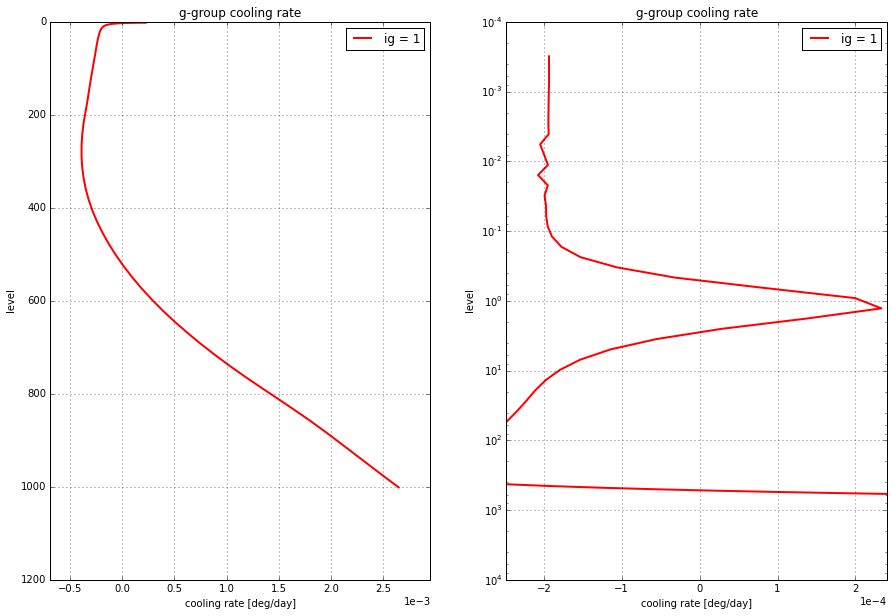

In [111]:
n_g = 1 # ds_coolrg.dims['g']

srss = [ds_coolrg['coolrg'].sel(g=ig).to_pandas() 
        for ig in range(1, n_g + 1)]

colours, linestyles = zip(*viz.matplotlib_colour_linestyle_tuples(N=n_g))

names = ['ig = {}'.format(ig) for ig in range(1, n_g + 1)]

ylabel = 'level'
xlabel = 'cooling rate [deg/day]'

title = 'g-group cooling rate'

fig = viz.plot_pdseries_indexVSvalues_linearlog(srss=srss,
                                                names=names,
                                                colours=colours,
                                                linestyles=linestyles,
                                                ylabel=ylabel,
                                                xlabel=xlabel,
                                                title=title,
                                                figsize=(15, 10))

In [110]:
ds_fluxg.sel(g=1).to_dataframe()

,g,level,flug,fldg,fnetg
pressure,,,,,
0.000000,1,1,-12.972142,0.000000e+00,-12.972142
0.000624,1,2,-12.972142,1.695014e-09,-12.972142
0.000876,1,3,-12.972142,2.388158e-09,-12.972142
0.001229,1,4,-12.972142,3.381420e-09,-12.972142
0.001723,1,5,-12.972142,4.813107e-09,-12.972142
0.002417,1,6,-12.972142,6.877042e-09,-12.972142
0.003391,1,7,-12.972142,9.852766e-09,-12.972142
0.004757,1,8,-12.972142,1.414320e-08,-12.972142
0.006672,1,9,-12.972142,2.032882e-08,-12.972142


In [124]:
for g in ds_absmean.coords['g']:
    if g == 1:
        ds_absmean['absmean'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)
    else:
        ds_absmean['absmeanlog'].sel(g=g).to_pandas()\
        .to_csv('group{g:d}_mean{g:d}k.txt'.format(g=int(g)), 
                sep=' ', index=None)

In [126]:
ds_absmean['absmeanlog'].sel(g=4)

<xarray.DataArray 'absmeanlog' (pressure: 75)>
array([  2.78925190e-24,   1.22791530e-23,   2.13566910e-23,
         2.76554330e-23,   3.58585710e-23,   4.65942740e-23,
         6.06937830e-23,   7.92680060e-23,   1.03809820e-22,
         1.36331480e-22,   1.79552050e-22,   2.37154370e-22,
         3.14137020e-22,   4.17327380e-22,   5.56954960e-22,
         7.47351530e-22,   1.00352990e-21,   1.34566120e-21,
         1.80266570e-21,   2.41196790e-21,   3.22232730e-21,
         4.30183850e-21,   5.74791440e-21,   7.73074840e-21,
         1.05011830e-20,   1.43640610e-20,   1.97415300e-20,
         2.72134980e-20,   3.75143130e-20,   5.16687410e-20,
         7.10033880e-20,   9.71142960e-20,   1.31592120e-19,
         1.75843770e-19,   2.31231930e-19,   2.95813830e-19,
         3.56124150e-19,   4.04414490e-19,   4.43172770e-19,
         4.73680940e-19,   4.96500980e-19,   5.13104240e-19,
         5.25007000e-19,   5.33439230e-19,   5.39154630e-19,
         5.42635860e-19,   5.44277190e

In [119]:
!ls

Untitled.ipynb	   group2_mean2k.txt  group4_mean4k.txt
group1_mean1k.txt  group3_mean3k.txt  lblnew_20160916_6dbbf16


In [120]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916


In [128]:
ds_dgdgs['dgs']

<xarray.DataArray 'dgs' (g: 4)>
array([ 0.54548538,  0.1455169 ,  0.24850232,  0.06049541])
Coordinates:
  * g        (g) int64 1 2 3 4